In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import xgboost as xgb

## Data Wrangling

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mikti/electricityConsumptionAndProductioction.csv')
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)
df

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...
2024-03-31 19:00:00,5618,5902,1398,505,2294,1012,620,6,65
2024-03-31 20:00:00,6107,6205,1395,671,2389,1037,645,0,66
2024-03-31 21:00:00,5991,5855,1395,868,2201,705,621,0,66


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46011 entries, 2019-01-01 00:00:00 to 2024-03-31 23:00:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Consumption    46011 non-null  int64
 1   Production     46011 non-null  int64
 2   Nuclear        46011 non-null  int64
 3   Wind           46011 non-null  int64
 4   Hydroelectric  46011 non-null  int64
 5   Oil and Gas    46011 non-null  int64
 6   Coal           46011 non-null  int64
 7   Solar          46011 non-null  int64
 8   Biomass        46011 non-null  int64
dtypes: int64(9)
memory usage: 3.5 MB


In [ ]:
df.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
std,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554
min,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000


### Visualisasi Data

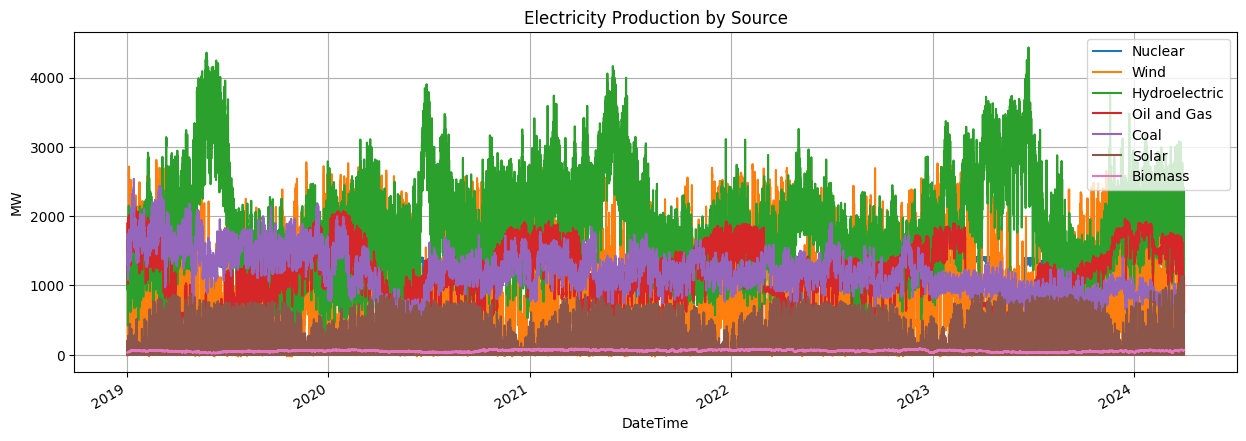

In [ ]:
columns_to_plot = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

df[columns_to_plot].plot(style='-', figsize=(15, 5), title='Electricity Production by Source')
plt.ylabel('MW')
plt.xlabel('DateTime')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
all_columns = ['Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
sum=[]
for i in all_columns:
  sum.append(df[i].sum())

sum_columns = pd.DataFrame(sum, index=all_columns, columns=['Sum'])
sum_columns


,Sum
Production,299929404
Nuclear,59408368
Wind,36455016
Hydroelectric,85444840
Oil and Gas,53919850
Coal,54898362
Solar,7209373
Biomass,2569800


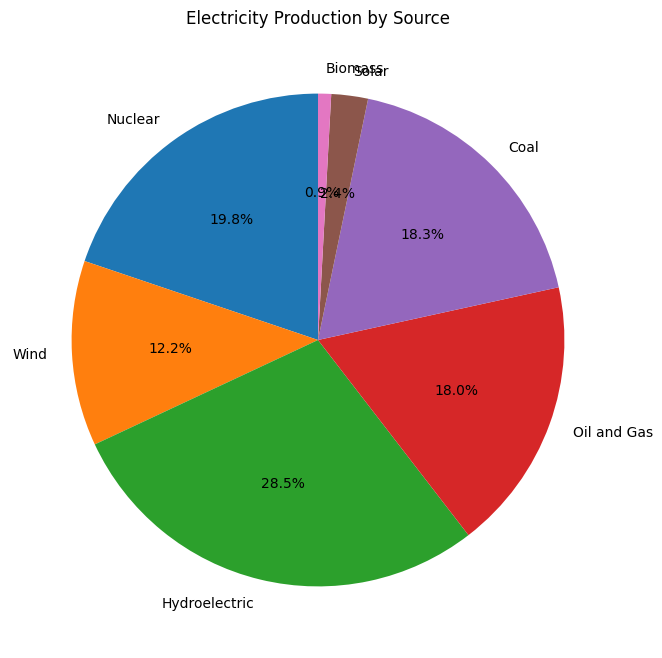

In [ ]:
# Pie chart
pie_columns= ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
pie_sum=sum[1:]

plt.figure(figsize=(8, 8))
plt.pie(pie_sum, labels=pie_columns, autopct='%1.1f%%', startangle=90)
plt.title('Electricity Production by Source')
plt.show()

In [ ]:
columns=['Production','Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
production_by_year = pd.DataFrame(df.groupby(df.index.year)[columns].sum())

production_by_year

,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,
2019,58628819,11283025,6689349,15666624,9317685,13856141,1377855,430290
2020,55456365,11488605,6895426,15432767,10176796,9623010,1352381,478143
2021,58831071,11307834,6494488,17455342,10718906,10962525,1294143,587656
2022,55208770,11112946,6886616,14077507,10622246,10554229,1383189,561798
2023,56509184,11207351,7338713,18379987,9596640,8152148,1472147,387838
2024,15295195,3008607,2150424,4432613,3487577,1750309,329658,124075


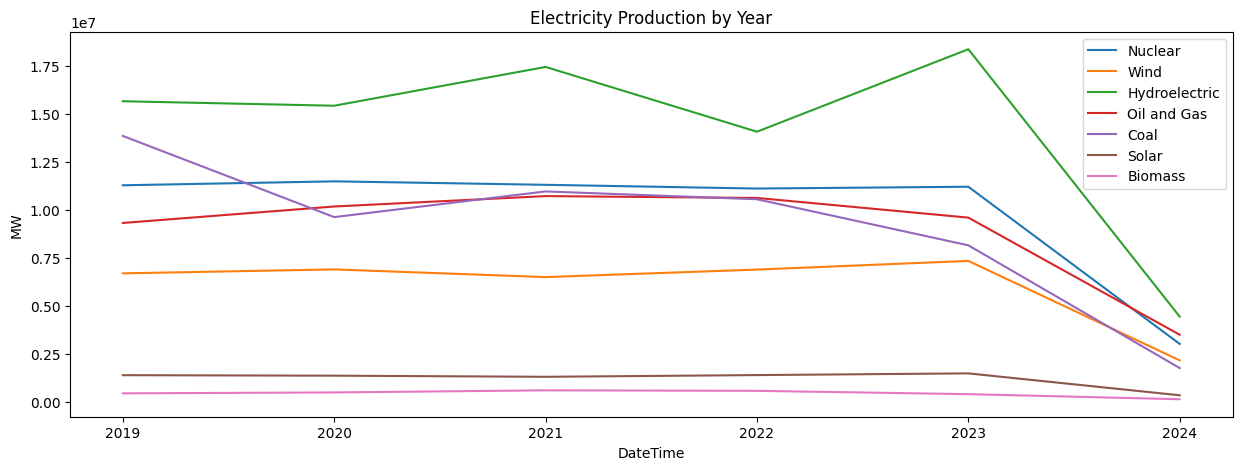

In [ ]:
production_by_year[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].plot(figsize=(15, 5), title='Electricity Production by Year')
plt.ylabel("MW")
plt.show()

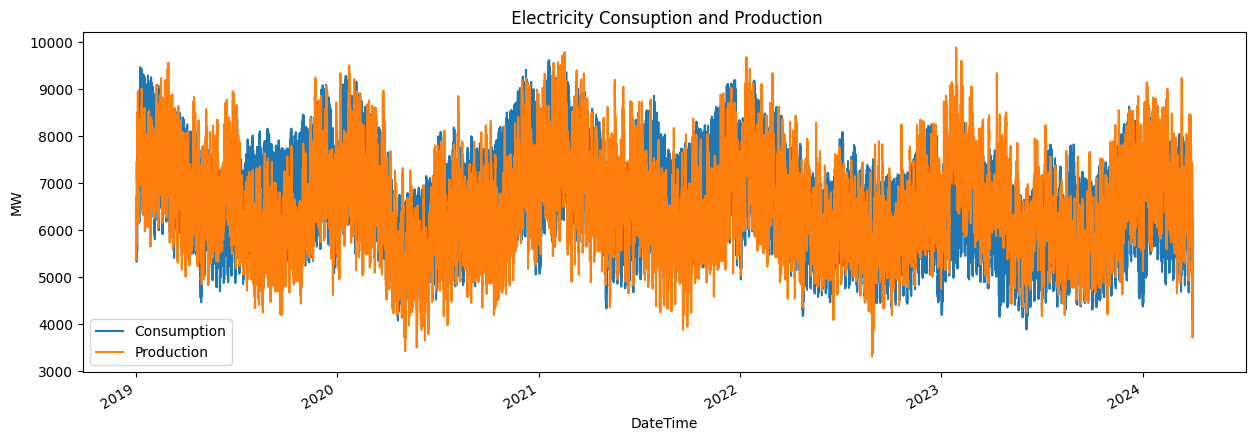

In [ ]:
df[["Consumption", "Production"]].plot(style="-", figsize = (15,5), title=" Electricity Consuption and Production")
plt.ylabel("MW")
plt.show()

In [ ]:
df2 = df["Consumption"]
df2

,Consumption
DateTime,
2019-01-01 00:00:00,6352
2019-01-01 01:00:00,6116
2019-01-01 02:00:00,5873
2019-01-01 03:00:00,5682
2019-01-01 04:00:00,5557
...,...
2024-03-31 19:00:00,5618
2024-03-31 20:00:00,6107
2024-03-31 21:00:00,5991


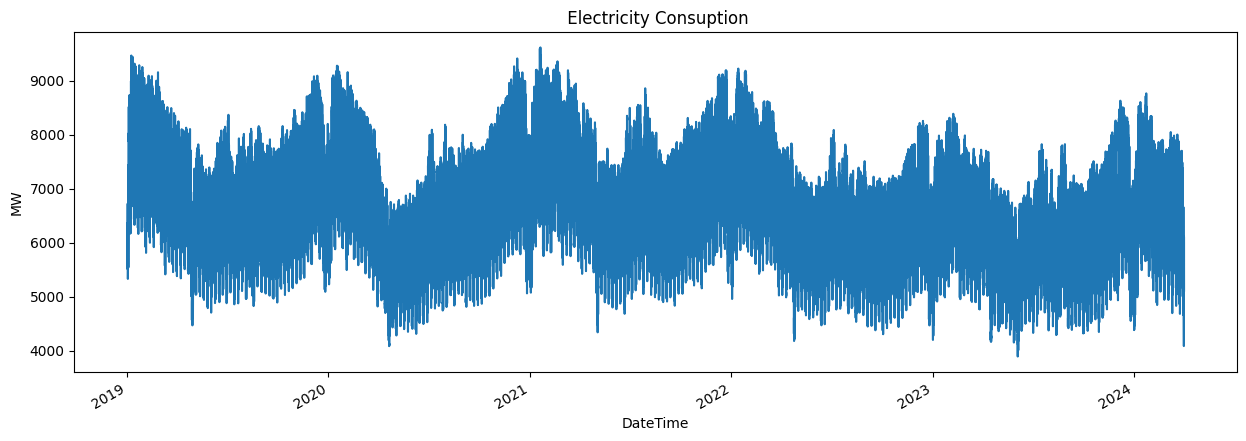

In [ ]:
df2.plot(style="-", figsize = (15,5), title=" Electricity Consuption")
plt.ylabel("MW")
plt.show()

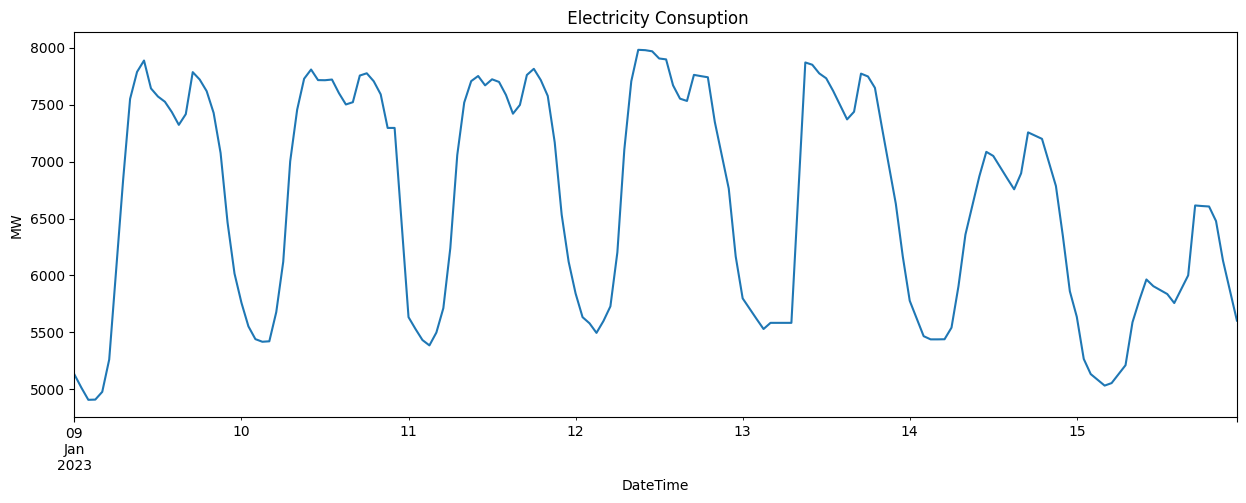

In [ ]:
df2["2023-01-09 00:00:00": "2023-01-15 23:59:59"].plot(style="-", figsize = (15,5), title=" Electricity Consuption")
plt.ylabel("MW")
plt.show()

## Data Preprocessing

In [ ]:
def createTimeFeatures(df):
  df['hour'] = df.index.hour
  df['day_of_week'] = df.index.day_of_week
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['day_of_year'] = df.index.day_of_year
  df['day_of_month'] = df.index.day

createTimeFeatures(df)
df.drop(["Production", "Nuclear","Wind", "Hydroelectric","Oil and Gas","Coal", "Solar" ,"Biomass"], axis=1, inplace=True)
df


,Consumption,hour,day_of_week,quarter,month,year,day_of_year,day_of_month
DateTime,,,,,,,,
2019-01-01 00:00:00,6352,0,1,1,1,2019,1,1
2019-01-01 01:00:00,6116,1,1,1,1,2019,1,1
2019-01-01 02:00:00,5873,2,1,1,1,2019,1,1
2019-01-01 03:00:00,5682,3,1,1,1,2019,1,1
2019-01-01 04:00:00,5557,4,1,1,1,2019,1,1
...,...,...,...,...,...,...,...,...
2024-03-31 19:00:00,5618,19,6,1,3,2024,91,31
2024-03-31 20:00:00,6107,20,6,1,3,2024,91,31
2024-03-31 21:00:00,5991,21,6,1,3,2024,91,31


cutoffDate 2023-04-02 00:00:00
train shape (37251, 8)
test shape (8760, 8)


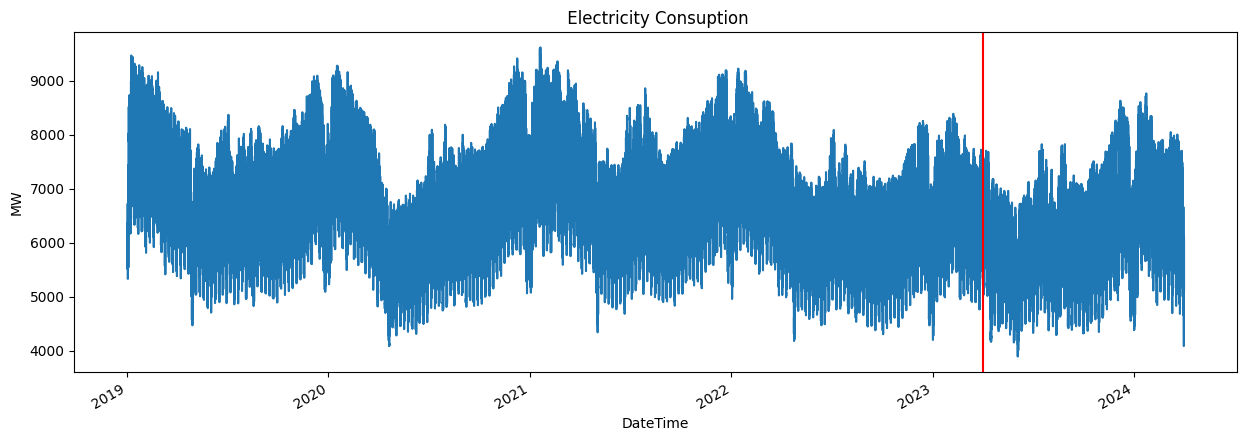

In [ ]:
cutoffDate = df.index[-365 * 24]
print(f"cutoffDate {cutoffDate}")

train = df.loc[df.index < cutoffDate]
test = df.loc[df.index >= cutoffDate]

print(f"train shape {train.shape}")
print(f"test shape {test.shape}")

df["Consumption"].plot(style="-", figsize = (15,5), title=" Electricity Consuption")
plt.ylabel("MW")
plt.axvline(cutoffDate, color='r', label = "cutoffDate")
plt.show()

## Modelling

In [ ]:
FEATURES = ["hour", "day_of_week", "quarter", "month", "year", "day_of_year", "day_of_month"]
TARGET = "Consumption"

X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

# XGB Regresson

regressor = xgb.XGBRegressor(n_estimators=5000, early_stoppin_rounds = 50, learning_rate=0.01)

regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

regressorOuput=regressor.predict(X_test)
prediction = pd.DataFrame(data= regressorOuput, index=X_test.index, columns=["prediction"])

df = df.merge(prediction, how="left", left_index=True, right_index=True)
df

[0]	validation_0-rmse:1025.28549	validation_1-rmse:1109.96773


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:19:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "early_stoppin_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:554.35837	validation_1-rmse:691.83023
[200]	validation_0-rmse:398.83788	validation_1-rmse:561.08337
[300]	validation_0-rmse:328.64371	validation_1-rmse:504.86160
[400]	validation_0-rmse:281.14404	validation_1-rmse:475.30921
[500]	validation_0-rmse:252.29694	validation_1-rmse:461.49809
[600]	validation_0-rmse:233.96528	validation_1-rmse:456.45621
[700]	validation_0-rmse:220.88687	validation_1-rmse:453.38786
[800]	validation_0-rmse:211.49044	validation_1-rmse:453.93740
[900]	validation_0-rmse:204.48928	validation_1-rmse:454.19543
[1000]	validation_0-rmse:197.09036	validation_1-rmse:454.20464
[1100]	validation_0-rmse:191.22798	validation_1-rmse:452.78489
[1200]	validation_0-rmse:186.01271	validation_1-rmse:451.47755
[1300]	validation_0-rmse:181.09940	validation_1-rmse:450.96745
[1400]	validation_0-rmse:176.88597	validation_1-rmse:450.89260
[1500]	validation_0-rmse:172.95877	validation_1-rmse:449.65290
[1600]	validation_0-rmse:168.38620	validation_1-rmse:449.67345
[

,Consumption,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,prediction
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,0,1,1,1,2019,1,1,NaN
2019-01-01 01:00:00,6116,1,1,1,1,2019,1,1,NaN
2019-01-01 02:00:00,5873,2,1,1,1,2019,1,1,NaN
2019-01-01 03:00:00,5682,3,1,1,1,2019,1,1,NaN
2019-01-01 04:00:00,5557,4,1,1,1,2019,1,1,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-31 19:00:00,5618,19,6,1,3,2024,91,31,6085.513672
2024-03-31 20:00:00,6107,20,6,1,3,2024,91,31,6367.030762
2024-03-31 21:00:00,5991,21,6,1,3,2024,91,31,6355.225586


In [ ]:
prediction

,prediction
DateTime,
2023-04-02 00:00:00,5257.300781
2023-04-02 01:00:00,5058.351562
2023-04-02 02:00:00,4879.848633
2023-04-02 03:00:00,4825.952637
2023-04-02 04:00:00,4867.090332
...,...
2024-03-31 19:00:00,6085.513672
2024-03-31 20:00:00,6367.030762
2024-03-31 21:00:00,6355.225586


### Test Eror

In [ ]:
def meanAbsoluteErrorPercentage(real, predicted):
  real = np.array(real)
  predicted = np.array(predicted)
  return np.mean(np.abs((real - predicted) / real)) * 100

In [ ]:
testDF = df.loc[df.index > cutoffDate]

yReal = testDF["Consumption"]
yPred = testDF["prediction"]

print(f"percentage error {meanAbsoluteErrorPercentage(yReal, yPred):.4f}")

percentage error 5.8585


<ipython-input-80-c674a7cdfe42>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend("True Data", "Prediction")


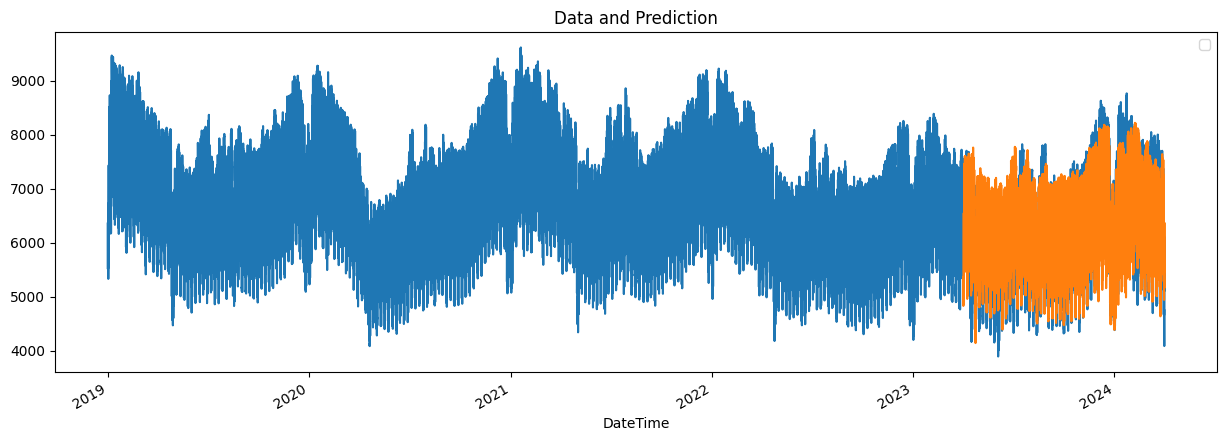

In [ ]:
ax = df[[TARGET]].plot(figsize=[15,5])
df["prediction"].plot(ax=ax, style="-")
ax.legend("True Data", "Prediction")
ax.set_title("Data and Prediction")
plt.show()

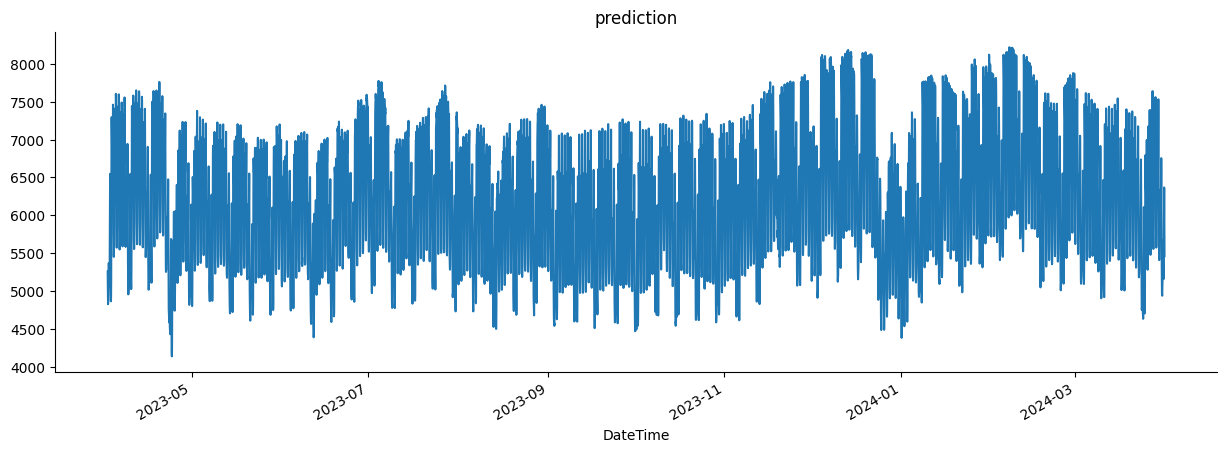

In [ ]:
# @title Visualisasi Prediction

from matplotlib import pyplot as plt
prediction['prediction'].plot(kind='line', figsize=(15, 5), title='prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

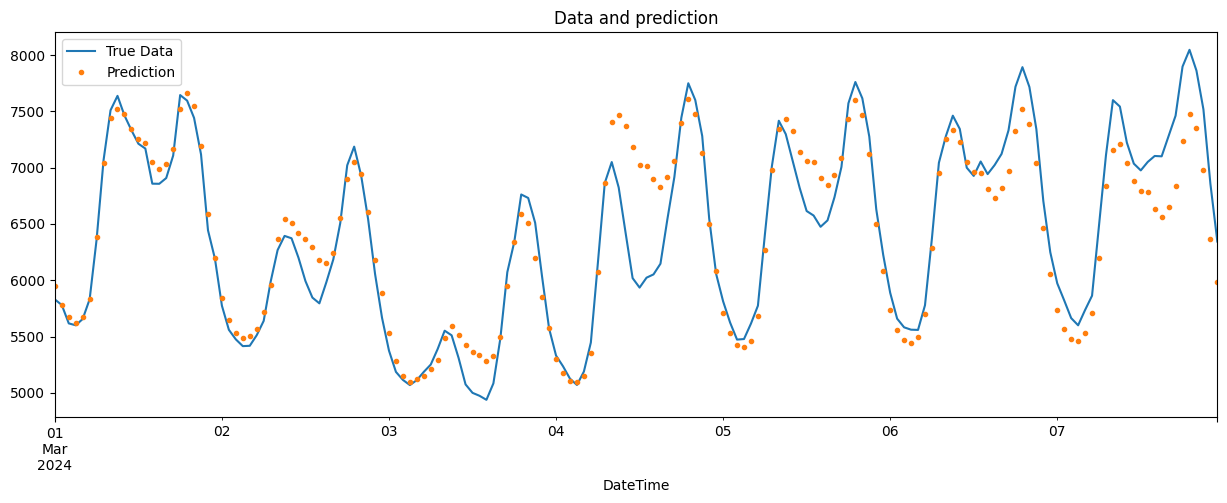

In [ ]:
ax = df["2024-03-01 00:00:00" : "2024-03-7 23:59:59"][[TARGET]].plot(figsize=(15,5))
df["2024-03-01 00:00:00" : "2024-03-7 23:59:59"]["prediction"].plot(ax=ax, style=".")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.show()

## Pengujian Dengan data baru

prediction consumption electrician in april 2024

In [ ]:
# Create date range for April 2024, hourly frequency for new data test
start_date = '2024-04-01 00:00:00'
end_date = '2024-04-30 23:00:00'
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

df_april = pd.DataFrame({'DateTime': date_range})
df_april = df_april.set_index('DateTime')

df_april


<ipython-input-83-40fbd440290c>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


""
DateTime
2024-04-01 00:00:00
2024-04-01 01:00:00
2024-04-01 02:00:00
2024-04-01 03:00:00
2024-04-01 04:00:00
...
2024-04-30 19:00:00
2024-04-30 20:00:00
2024-04-30 21:00:00


In [ ]:
# make new columns in new data with used the fuction
createTimeFeatures(df_april)
df_april

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month
DateTime,,,,,,,
2024-04-01 00:00:00,0,0,2,4,2024,92,1
2024-04-01 01:00:00,1,0,2,4,2024,92,1
2024-04-01 02:00:00,2,0,2,4,2024,92,1
2024-04-01 03:00:00,3,0,2,4,2024,92,1
2024-04-01 04:00:00,4,0,2,4,2024,92,1
...,...,...,...,...,...,...,...
2024-04-30 19:00:00,19,1,2,4,2024,121,30
2024-04-30 20:00:00,20,1,2,4,2024,121,30
2024-04-30 21:00:00,21,1,2,4,2024,121,30


In [ ]:
FEATURES1 = ["hour", "day_of_week", "quarter", "month", "year", "day_of_year", "day_of_month"]
X_april = df_april[FEATURES1]

april_predictions = regressor.predict(X_april)
df_april["Prediction"] = pd.DataFrame(april_predictions, index=df_april.index, columns=["Prediction"])
df_april


,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,Prediction
DateTime,,,,,,,,
2024-04-01 00:00:00,0,0,2,4,2024,92,1,5252.300781
2024-04-01 01:00:00,1,0,2,4,2024,92,1,5100.782227
2024-04-01 02:00:00,2,0,2,4,2024,92,1,5025.637207
2024-04-01 03:00:00,3,0,2,4,2024,92,1,4993.984863
2024-04-01 04:00:00,4,0,2,4,2024,92,1,5047.472656
...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,19,1,2,4,2024,121,30,6679.299805
2024-04-30 20:00:00,20,1,2,4,2024,121,30,7042.182129
2024-04-30 21:00:00,21,1,2,4,2024,121,30,7101.088867


In [ ]:
df_april["Prediction"].describe()

,Prediction
count,720.000000
mean,6221.276855
std,800.561707
min,4308.340820
25%,5583.796265
50%,6230.996094
75%,6898.291870
max,7710.630859


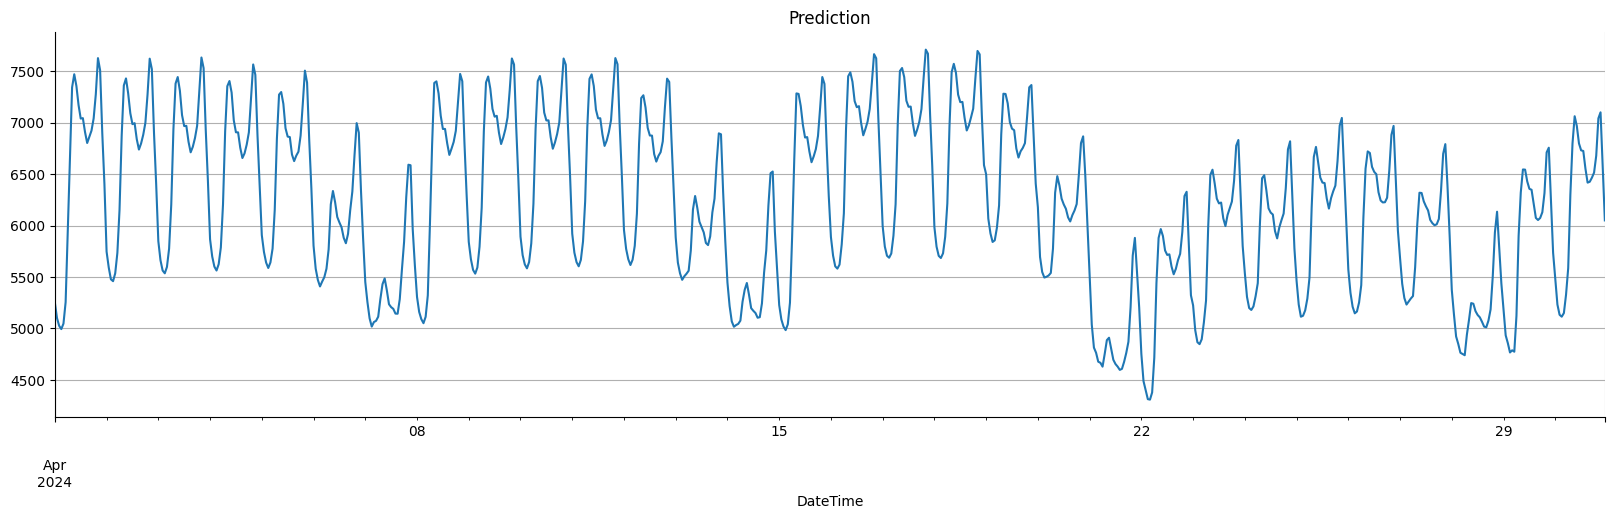

In [ ]:
# @title Visualisasi Prediction in April 2024
df_april['Prediction'].plot(kind='line', figsize=(20, 5), title='Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

In [ ]:
# slicing data april 2023
df_april2023 = pd.DataFrame(df["2023-04-01 00:00:00" : "2023-04-30 23:59:59"])
df_april2023

,Consumption,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,prediction
DateTime,,,,,,,,,
2023-04-01 00:00:00,5908,0,5,2,4,2023,91,1,NaN
2023-04-01 01:00:00,5671,1,5,2,4,2023,91,1,NaN
2023-04-01 02:00:00,5568,2,5,2,4,2023,91,1,NaN
2023-04-01 03:00:00,5553,3,5,2,4,2023,91,1,NaN
2023-04-01 04:00:00,5553,4,5,2,4,2023,91,1,NaN
...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,5247,19,6,2,4,2023,120,30,5453.472168
2023-04-30 20:00:00,5700,20,6,2,4,2023,120,30,5956.897461
2023-04-30 21:00:00,5842,21,6,2,4,2023,120,30,6140.486328


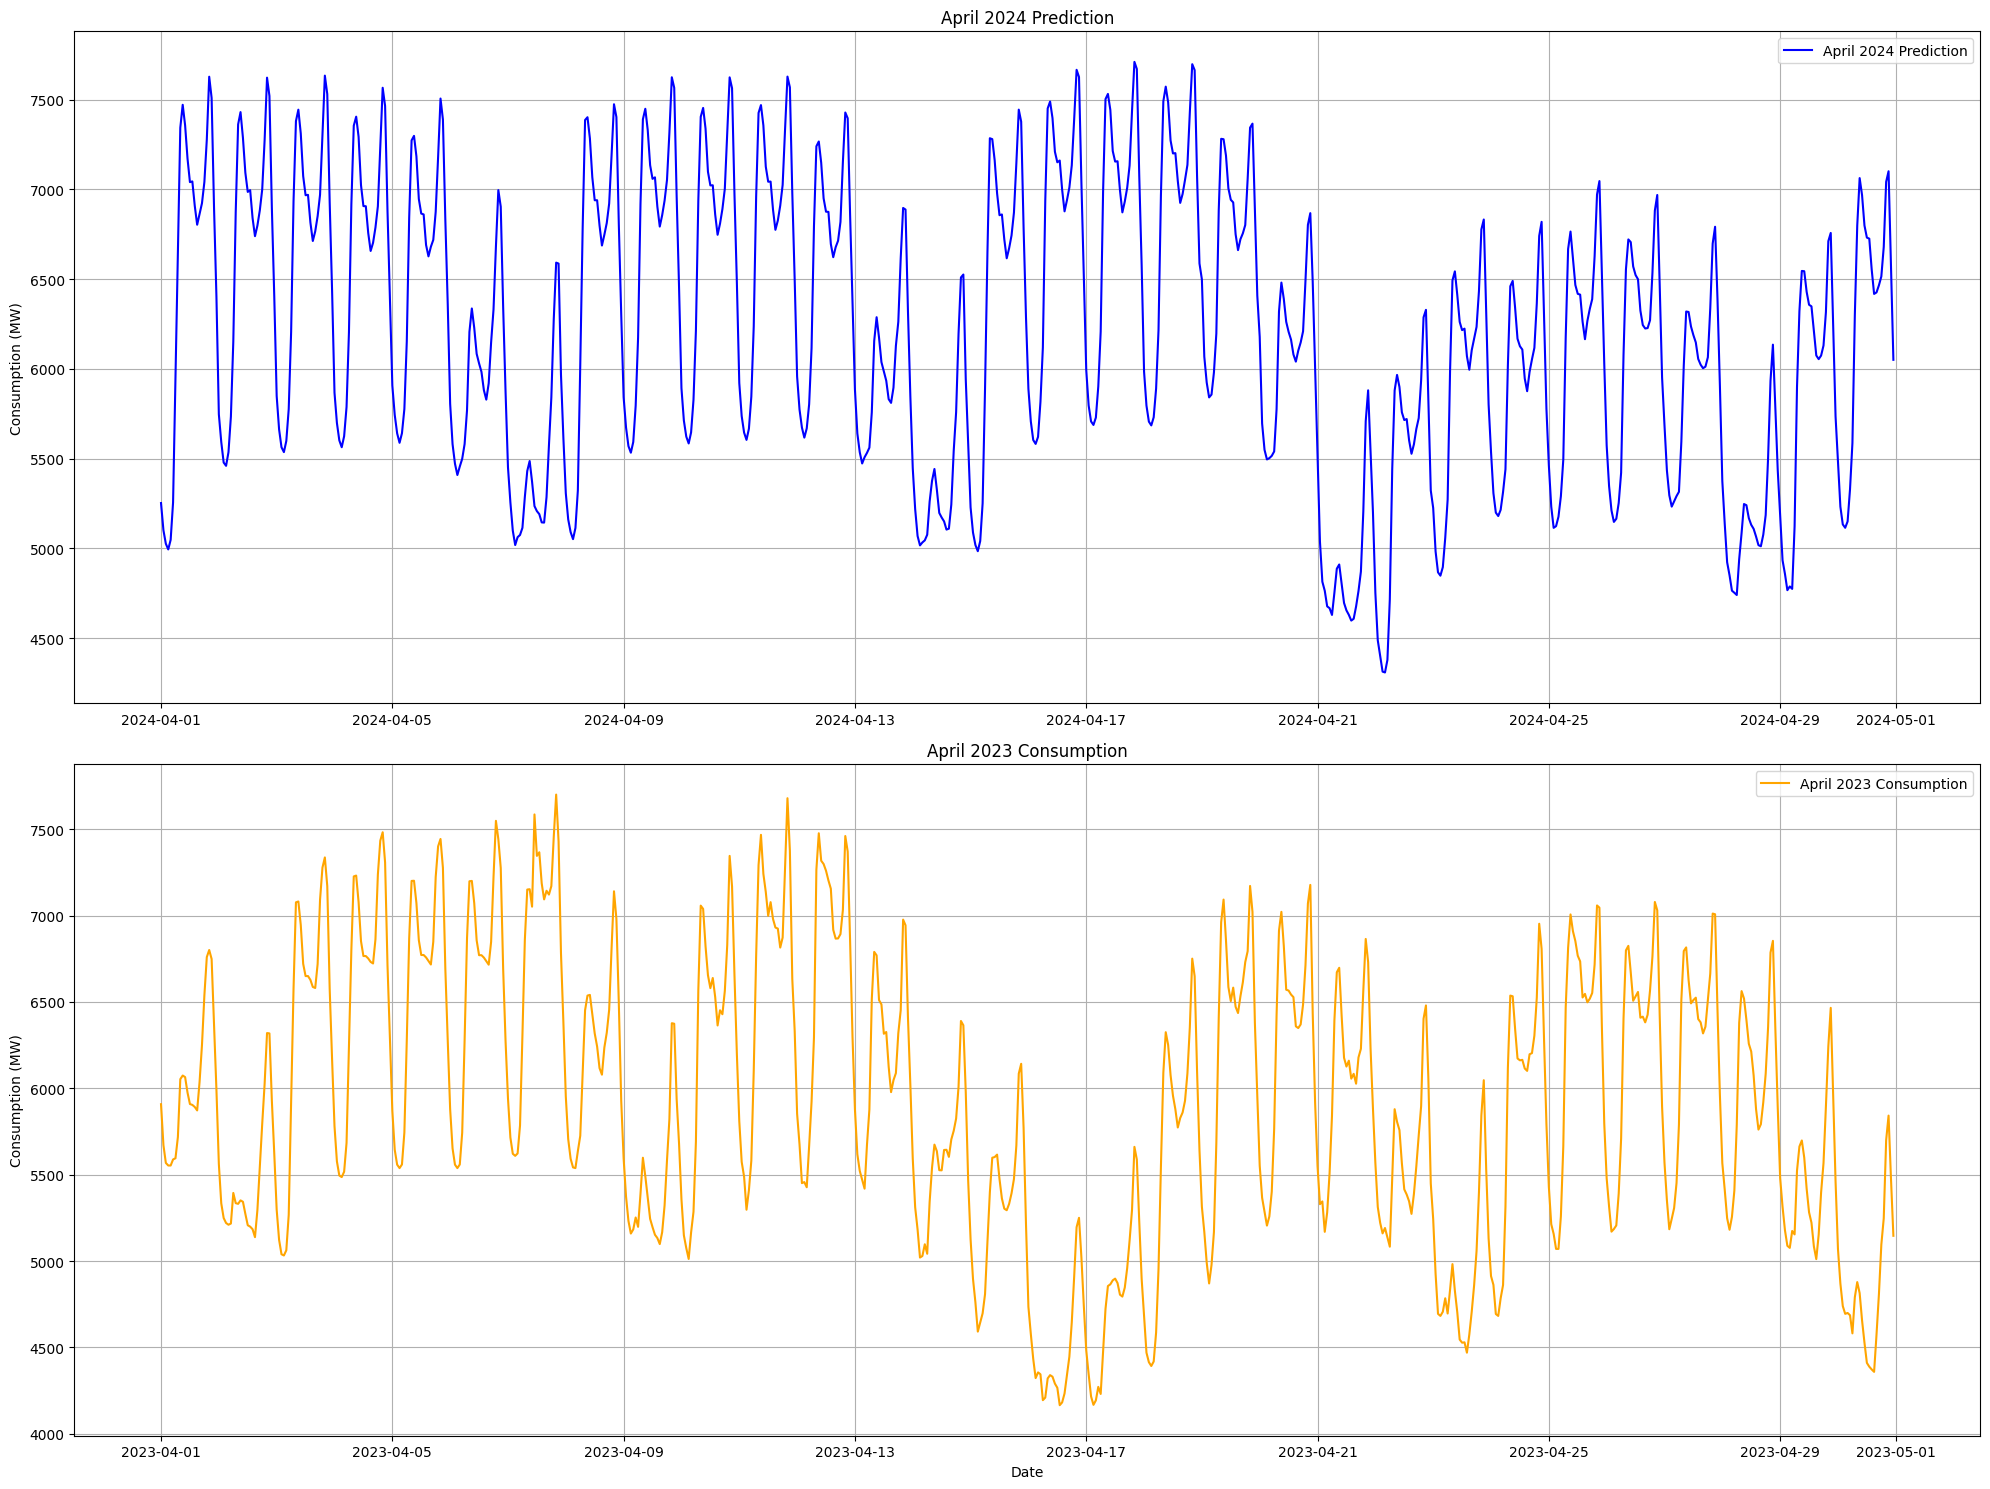

In [ ]:
# @title Visualisasi Prediction in April 2024 with April 2023 data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=False)

# Plot April 2024 Prediction
ax1.plot(df_april.index, df_april['Prediction'], label='April 2024 Prediction', color='blue')
ax1.set_title('April 2024 Prediction')
ax1.set_ylabel('Consumption (MW)')
ax1.legend()
ax1.grid(True)

# Plot April 2023 Consumption
ax2.plot(df_april2023.index, df_april2023['Consumption'], label='April 2023 Consumption', color='orange')
ax2.set_title('April 2023 Consumption')
ax2.set_xlabel('Date')
ax2.set_ylabel('Consumption (MW)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()